In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
df=pd.read_csv('Sales_add.csv')

In [3]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
df.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [5]:
df.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [6]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [7]:
df.shape

(22, 5)

There are 22 raws and 5 columns in the data 

# to clarify whether there is any increase in sales after stepping into digital marketing

H0 : mean sales before stepping into digital marketing= mean sales after stepping into digital marketing
Ha : mean sales before steping into digital marketing < mean sales after stepping into digital marketing

In [8]:
df.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [9]:
df['Sales_before_digital_add(in $)'].mean()

149239.95454545456

In [10]:
df['Sales_After_digital_add(in $)'].mean()

231123.72727272726

In [13]:
stat.ttest_ind(df['Sales_before_digital_add(in $)'],df['Sales_After_digital_add(in $)'],equal_var=True)

Ttest_indResult(statistic=-12.995084451110877, pvalue=2.614368006904645e-16)

Since p value is less than 0.05 we reject the null hypothesis.
i.e mean sales after stepping into digital marketing is greater than mean sales before stepping into digital marketing.

# to check whether there is any dependency between the features “Region” and “Manager”.



H0 : No dependency between "region" and "manager"
Ha : There is significant dependency between "region" and "manager"

In [14]:
crosstab = pd.crosstab(df['Region'], df['Manager'], normalize='index')
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.400000,0.300000,0.300000
Region - B,0.571429,0.142857,0.285714
Region - C,0.200000,0.600000,0.200000


In [15]:
from scipy.stats import chi2_contingency

In [16]:
c, p, dof, expected = chi2_contingency(crosstab)
print('chi square statistic:',c)
print('pvalue:',p)
print('degrees of freedom:',dof)

chi square statistic: 0.5097129666190809
pvalue: 0.9725485584250712
degrees of freedom: 4


p-value is greater than 0.05,so we cannot reject null hypothesis ie the variables region and manager are independent

<AxesSubplot:>

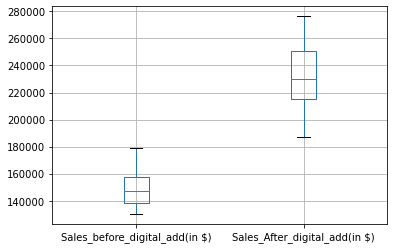

In [20]:
df.boxplot(column=['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'])